<a href="https://colab.research.google.com/github/stanislavlia/toy_AutoGrad/blob/master/computation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:



class Value:
    def __init__(self, val, _parents=(), _op=''):
        self.val = val
        self._prev = set(_parents)
        self._op = _op
        self.grad = 0.0

    def __repr__(self):
        return f"Value(val={self.val})"

    def __add__(self, another_value):

        result = self.val + another_value.val
        out = Value(result, _parents=(self, another_value), _op='+')
        return out

    def __mul__(self, another_value):

        result = self.val * another_value.val
        out = Value(result, _parents=(self, another_value), _op='*')

        return out


In [82]:
a = Value(12)
b = Value(3)
d = Value(9)

c = a * b
final = c * Value(-3)


In [76]:
c._op

'*'

**Visualizing computational graph**

In [86]:
# brew install graphviz
#pip install graphviz
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ value %.4f}" % (n.val), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

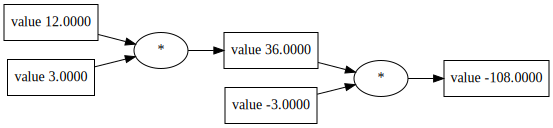

In [87]:

draw_dot(final)